# Project 3 - Predicting Subreddit Posts

This is the second part of a series of notebooks using Classifier models to correctly identify the subreddit posts from subreddit r/backpacking and r/travel. In the previous notebook, we did our data collection by creating a function to web scrap subreddit online posts using Pushshift API. We will now continue with the data cleaning and preprocessing portion.

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 15)

In [3]:
pd.set_option("display.max_rows", 1000)

In [4]:
pd.options.display.max_colwidth = 4000

# Data Cleaning and Preprocessing

## Read in Data

In [5]:
backpack = pd.read_csv('../datasets/backpack_subs.csv')

In [6]:
travel = pd.read_csv('../datasets/travel_subs.csv')

Briefly inspecting overall dataframes top 5 rows and their shapes

In [7]:
backpack.head()

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
0,solarhikes,t2_66soeyfs,1632314331,pt6nrw,False,1,/r/backpacking/comments/pt6nrw/2021_colorado_trail_thru_hike/,1,NaN,backpacking,2021 Colorado Trail Thru Hike,https://youtu.be/JEzAjlGIVtI
1,lepeskin,t2_nnkkh,1632322776,pt9bqx,True,1,/r/backpacking/comments/pt9bqx/siguniangshan_tibet_four_sisters_mountain/,1,[removed],backpacking,"Siguniangshan, Tibet, Four Sisters Mountain",https://www.reddit.com/r/backpacking/comments/pt9bqx/siguniangshan_tibet_four_sisters_mountain/
2,natureboy234,t2_200p9g3k,1632330538,ptc2t2,True,0,/r/backpacking/comments/ptc2t2/pack_on_a_plane/,1,I’m taking a trip to Europe within a few days and am planning on taking my 65L Rei backpack. I know it’s too large to be a carry on but I really don’t want to check it as I have multiple layovers and haven’t had the best experience with bags at airports in the past. \nAre there any other options I have to make sure my pack doesn’t get lost or stolen?,backpacking,Pack on a plane?,https://www.reddit.com/r/backpacking/comments/ptc2t2/pack_on_a_plane/
3,greeneyedcat711,t2_3os7b9po,1632349599,pthcsv,True,0,/r/backpacking/comments/pthcsv/psa_double_check_your_nesting_cookware_before/,6,"A friend and I went backcountry camping in NM. We literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. We had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). Unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. Obviously, that’s a no no, which we knew considering we bought the fuel canister in NM, and had intended to trash the fuel canister before going through security. Well, we forgot, and TSA was not forgiving of the mistake. We were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. Instead they took pictures of IDs and boarding pass. We were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future TSA Pre-check privileges (which would really suck considering we paid for Global Entry right before the pandemic hit and have only gotten to use it once). So moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. Anxiously awaiting said letter and hoping TSA can be forgiving of an honest mistake.",backpacking,PSA: Double check your nesting cookware before flying,https://www.reddit.com/r/backpacking/comments/pthcsv/psa_double_check_your_nesting_cookware_before/
4,wiscogirl2185,t2_4iqoe16j,1632358955,ptk68w,True,1,/r/backpacking/comments/ptk68w/water_suggestions/,1,"Taking my first backcountry trip in the Badlands next week; it will be four days long. From what I’ve read, there is not potable water where we will be. I have not done a hike where there weren’t water sources so looking for suggestions on what type of vessel to take (bladder, Smart Water bottles, Nalgene, etc) and also how much to take. I will have electrolyte mix to get some bang for my buck.",backpacking,Water suggestions,https://www.reddit.com/r/backpacking/comments/ptk68w/water_suggestions/


In [8]:
backpack.shape

(998, 12)

In [9]:
travel.head()

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
0,jgoat25,t2_e7fz9qh5,1632315586,pt70sh,True,0,/r/travel/comments/pt70sh/help/,1,"I live in Canada and want to travel to Miami Florida, The problem is I got the Moderna vaccine and the Pfizer one as my second. So i am mixed vaxxed, im inquiring if i would be able to travel there by plane? Would it help if i get a 3rd vaccine lol, or not?",travel,Help!,https://www.reddit.com/r/travel/comments/pt70sh/help/
1,tobe4funas,t2_nn9jz,1632315920,pt74nd,True,1,/r/travel/comments/pt74nd/suggestions_for_planning_2_months_long_stay_in/,1,[removed],travel,Suggestions for planning ~2 months long stay in Japan?,https://www.reddit.com/r/travel/comments/pt74nd/suggestions_for_planning_2_months_long_stay_in/
2,AlarmingInstance,t2_6p3apelj,1632316235,pt780a,True,1,/r/travel/comments/pt780a/italy_october_itinerary/,1,"Hi all!\n\nI'm going to Italy in October and need help deciding where to go my first day and a half there. I've been doing some research on my own but I would love the opinions of locals or people that have been to Italy before. \n\nMy favorite thing about traveling is finding those hidden gems that aren't as well known, so I would like to do something that's less of a photo op, and more of a local experience.\n\nThanks so much for your help!\n\n\---\n\nHere's my itinerary:\n\n**Day 1:** Arrive in Rome at 7:00\n\n*(I have a day and a half to explore on my own - need to arrive to Florence by 15:00 Day 2)*\n\n**Day 2:** Florence\n\n**Day 3 and 4:** San Gimignano / Siena\n\n**Day 5:** Truffle hunting in the countryside then heading to Florence\n\n**Day 6:** Florence then Rome\n\n**Day 7-8:** Rome",travel,Italy October Itinerary,https://www.reddit.com/r/travel/comments/pt780a/italy_october_itinerary/
3,cru_jonze,t2_93h7h,1632316489,pt7arq,True,0,/r/travel/comments/pt7arq/best_nyc_movie_tour_or_any_movies_shooting_in_nyc/,1,"I will be in the city this weekend and wanted to visit some iconic locations, or better yet, watch something currently shooting in the city. I live on the east coast so I have visited a lot of the standards already (Ghostbusters HQ, Rockefeller, Bethesda Terrace) but looking for something a bit more off the beaten path.",travel,Best NYC movie tour or any movies shooting in NYC right now?,https://www.reddit.com/r/travel/comments/pt7arq/best_nyc_movie_tour_or_any_movies_shooting_in_nyc/
4,RobinHoodProtocol,t2_cs279771,1632316825,pt7eag,False,0,/r/travel/comments/pt7eag/chhatrapati_shivaji_maharaj_terminus_ex_victoria/,1,NaN,travel,"Chhatrapati Shivaji Maharaj Terminus (ex Victoria Terminus), Mumbai (ex Bombay). Shantaram’s traces [OC]",https://i.redd.it/xcxg627g22p71.jpg


In [10]:
travel.shape

(1051, 12)

## Check for missing values

In [11]:
# check for missing values
backpack.isnull().sum()

author             0
author_fullname    2
created_utc        0
id                 0
is_self            0
num_comments       0
permalink          0
score              0
selftext           2
subreddit          0
title              0
url                0
dtype: int64

In [12]:
travel.isnull().sum()

author             0
author_fullname    2
created_utc        0
id                 0
is_self            0
num_comments       0
permalink          0
score              0
selftext           2
subreddit          0
title              0
url                0
dtype: int64

### Handling missing values for subreddit Backpack

We will look closer at the missing values in the author_fullname column.

In [13]:
backpack.loc[backpack['author_fullname'].isnull()]

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
40,[deleted],NaN,1632005604,pqwcoo,False,2,/r/backpacking/comments/pqwcoo/sharing_a_good_coffee_option/,1,[deleted],backpacking,Sharing a good coffee option!,https://www.stonecreekcoffee.com/product/single-serve-steeped-cream-city/
217,[deleted],NaN,1630575481,pgehxx,True,2,/r/backpacking/comments/pgehxx/vienna_alps/,1,NaN,backpacking,Vienna Alps :),https://www.reddit.com/r/backpacking/comments/pgehxx/vienna_alps/


Since the rows above also have missing data in the selftext column, they are not useful, we will proceed to drop them.

In [14]:
backpack.shape

(998, 12)

In [15]:
backpack = backpack[~backpack['author_fullname'].isnull()]

In [16]:
backpack.shape

(996, 12)

We will now check on the missing value in the selftext column.

In [17]:
backpack.loc[backpack['selftext'].isnull()]

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
0,solarhikes,t2_66soeyfs,1632314331,pt6nrw,False,1,/r/backpacking/comments/pt6nrw/2021_colorado_trail_thru_hike/,1,NaN,backpacking,2021 Colorado Trail Thru Hike,https://youtu.be/JEzAjlGIVtI


We will drop this row as well.

In [18]:
backpack.shape

(996, 12)

In [19]:
backpack = backpack[~backpack['selftext'].isnull()]

In [20]:
backpack.shape

(995, 12)

We will double check that all missing values are accounted for.

In [21]:
backpack.isnull().sum()

author             0
author_fullname    0
created_utc        0
id                 0
is_self            0
num_comments       0
permalink          0
score              0
selftext           0
subreddit          0
title              0
url                0
dtype: int64

We will also have a look at the author column to see if there are moderator bots.

In [22]:
backpack['author'].value_counts()

digitalmsb              6
MBKfan                  6
jeff000000              5
Cool_Rock_7462          5
Brave-Tumbleweed7674    4
cmr051893               4
Lopsided_Rutabaga_52    4
FromTheTrees710         3
cloroxism               3
Disastrous-Ad-7425      3
Tiger_Bite_Kid          3
peripateticblogger      3
TurtleSweetRolls        3
bisleykid               3
ExplorewithPooja        3
MaxFish1275             3
VeniceBeachHomie        3
openwritersroom         3
-RUGER57                3
bread_637               3
CAhappycow              3
Director360             3
Striking_Average253     3
DamoclesCapital         3
grepzilla               3
liamb7951               3
x1Bolt                  3
freshsmith786           2
felixdixon              2
Yarong                  2
baggik                  2
ChaoticDominance        2
vaisuki                 2
Tulip_Harvester         2
Mirat01                 2
psychodahick            2
urbanquestteam          2
marcelrene2003          2
Well_Seasone

There doesn't seem to be any moderator bots within the dataset.

### Handling missing values for subreddit Travel

We will look closer at the missing values of the author_fullname column.

In [23]:
travel.loc[travel['author_fullname'].isnull()]

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
11,[deleted],NaN,1632326513,ptamw4,True,0,/r/travel/comments/ptamw4/working_in_hostels/,1,NaN,travel,Working in hostels,https://www.reddit.com/r/travel/comments/ptamw4/working_in_hostels/
69,[deleted],NaN,1632160026,przwpm,False,0,/r/travel/comments/przwpm/cinematic_istanbul_turkey/,1,[deleted],travel,Cinematic Istanbul Turkey,https://v.redd.it/ow26nk9u3po71


Similarly, we will remove these rows as the data in the selftext column are not meaningful.

In [24]:
travel.shape

(1051, 12)

In [25]:
travel = travel[~travel['author_fullname'].isnull()]

In [26]:
travel.shape

(1049, 12)

We will have a look at the missing value in the selftext column as well.

In [27]:
travel.loc[travel['selftext'].isnull()]

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
4,RobinHoodProtocol,t2_cs279771,1632316825,pt7eag,False,0,/r/travel/comments/pt7eag/chhatrapati_shivaji_maharaj_terminus_ex_victoria/,1,NaN,travel,"Chhatrapati Shivaji Maharaj Terminus (ex Victoria Terminus), Mumbai (ex Bombay). Shantaram’s traces [OC]",https://i.redd.it/xcxg627g22p71.jpg


We will drop this row as well.

In [28]:
travel.shape

(1049, 12)

In [29]:
travel = travel[~travel['selftext'].isnull()]

In [30]:
travel.shape

(1048, 12)

In [31]:
travel.isnull().sum()

author             0
author_fullname    0
created_utc        0
id                 0
is_self            0
num_comments       0
permalink          0
score              0
selftext           0
subreddit          0
title              0
url                0
dtype: int64

We will also inspect for any moderator bots.

In [32]:
travel['author'].value_counts()

JealousAuthor49161      5
benandfriendz           4
wallpapersdance         4
elizahmendoza           4
maddux01                4
Jakertrader47           4
Mulligan0816            3
superfreakonomicsfan    3
milkshakedog111         3
the_alluringorchid      3
Daniel_Brett_1976       2
The_Brewer              2
Gio25us                 2
nate961                 2
conundrum4485           2
Floatinger              2
ProdigyTorres           2
kebabman9               2
Nakedsunshine1991       2
Laurence72              2
Giftedlean              2
tmodicaa                2
UsuallyDemanding        2
Beneficial_Nebula_89    2
destinyg3003            2
FormerFruit             2
Additional_Pair9428     2
NateValentine           2
kp313                   2
DarcyFinch              2
brilliantunknown        2
yellowpaperman          2
-SpaghettiCat-          2
SubstantialErrors       2
slinkyLinx              2
FrontCauliflower5181    2
guidefru                2
ayereem                 2
dudeimmadoc 

There are no bots.

## Check for miscellaneous things

We will also check if there is any metadata text in the selftext column.

In [33]:
backpack[backpack['selftext'] == '[removed]']

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
1,lepeskin,t2_nnkkh,1632322776,pt9bqx,True,1,/r/backpacking/comments/pt9bqx/siguniangshan_tibet_four_sisters_mountain/,1,[removed],backpacking,"Siguniangshan, Tibet, Four Sisters Mountain",https://www.reddit.com/r/backpacking/comments/pt9bqx/siguniangshan_tibet_four_sisters_mountain/


In [34]:
travel[travel['selftext'] == '[removed]']

,author,author_fullname,created_utc,id,is_self,num_comments,permalink,score,selftext,subreddit,title,url
1,tobe4funas,t2_nn9jz,1632315920,pt74nd,True,1,/r/travel/comments/pt74nd/suggestions_for_planning_2_months_long_stay_in/,1,[removed],travel,Suggestions for planning ~2 months long stay in Japan?,https://www.reddit.com/r/travel/comments/pt74nd/suggestions_for_planning_2_months_long_stay_in/


We will also remove these rows as well.

In [35]:
backpack.shape

(995, 12)

In [36]:
backpack = backpack[~(backpack['selftext'] == '[removed]')]

In [37]:
backpack.shape

(994, 12)

In [38]:
travel.shape

(1048, 12)

In [39]:
travel = travel[~(travel['selftext'] == '[removed]')]

In [40]:
travel.shape

(1047, 12)

## Combining Dataframes

We will combine both dataframes to begin our data cleaning and analysis. Before that, we will double check to ensure that there are no duplicates of rows in either subreddit comment dataframes.

In [41]:
backpack.duplicated().sum()

0

In [42]:
travel.duplicated().sum()

0

We will combine both dataframes by concatenating them. For our analysis, we will only be focusing on the body and subreddit columns.

In [43]:
backpack.shape

(994, 12)

In [44]:
travel.shape

(1047, 12)

In [45]:
df = pd.concat([backpack[['author', 'title', 'selftext', 'subreddit']], 
                travel[['author', 'title', 'selftext', 'subreddit']]], axis=0, ignore_index=True)
df

,author,title,selftext,subreddit
0,natureboy234,Pack on a plane?,I’m taking a trip to Europe within a few days and am planning on taking my 65L Rei backpack. I know it’s too large to be a carry on but I really don’t want to check it as I have multiple layovers and haven’t had the best experience with bags at airports in the past. \nAre there any other options I have to make sure my pack doesn’t get lost or stolen?,backpacking
1,greeneyedcat711,PSA: Double check your nesting cookware before flying,"A friend and I went backcountry camping in NM. We literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. We had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). Unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. Obviously, that’s a no no, which we knew considering we bought the fuel canister in NM, and had intended to trash the fuel canister before going through security. Well, we forgot, and TSA was not forgiving of the mistake. We were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. Instead they took pictures of IDs and boarding pass. We were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future TSA Pre-check privileges (which would really suck considering we paid for Global Entry right before the pandemic hit and have only gotten to use it once). So moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. Anxiously awaiting said letter and hoping TSA can be forgiving of an honest mistake.",backpacking
2,wiscogirl2185,Water suggestions,"Taking my first backcountry trip in the Badlands next week; it will be four days long. From what I’ve read, there is not potable water where we will be. I have not done a hike where there weren’t water sources so looking for suggestions on what type of vessel to take (bladder, Smart Water bottles, Nalgene, etc) and also how much to take. I will have electrolyte mix to get some bang for my buck.",backpacking
3,Easy-Try-1351,"Looking for souvenirs from Poland, Croatia, Germany &amp; Lithuania","Hi all,\n\nI am a fellow traveller from Poland. Nice to meet you. Long story short, due to various reasons I've been unable to purchase souvenirs from some places that I've been to. I am looking for those from the cities below (no postcards, magnets please!). I'll cover costs of the purchase and shipping &amp; pay you for the trouble as well. As a proof, I am attaching pictures of my current collection: [https://drive.google.com/drive/folders/1I6XMIeY7rQam0uji\_LabXDrVEieqBMQV?usp=sharing](https://drive.google.com/drive/folders/1I6XMIeY7rQam0uji_LabXDrVEieqBMQV?usp=sharing)\n\n&amp;#x200B;\n\nHere's the list:\n\n&amp;#x200B;\n\nPOLAND\n\nMielno\n\nSzczeliniec Wielki\n\nZloty Stok\n\nOswiecim - Auschwitz-Birkenau\n\nKatowice\n\nWilczy Szaniec\n\nMikolajki\n\nBialystok\n\nLodz\n\nBydgoszcz\n\nOlsztyn\n\n&amp;#x200B;\n\nCROATIA\n\nDubrovnik\n\nSplit\n\nZadar\n\nPula\n\n&amp;#x200B;\n\nGERMANY\n\nHanover\n\nHamburg\n\n&amp;#x200B;\n\nLITHUANIA\n\nTrakai\n\n&amp;#x200B;\n\n&amp;#x200B;\n\n&amp;#x200B;\n\nPlease DM me if you can help me!\n\n&amp;#x200B;\n\nCheers,\n\nRadoslaw",backpacking
4,FitPandaBear,Finding Fellow Backpackers And Solo Travelers In Every New City!,"After all my years of traveling around, what has been most exciting for me are the people I met and the friends I made. I learned that for some solo travelers and nomads sometimes it's challenging for them to meet new people every time they switch to a new city. That is why I created Nomad Friend Groups, free telegram groups that you can hop in and meet other travelers with over 200+ cities around the world! \n\n\nIntroduci

In [46]:
df.shape

(2041, 4)

## Cleaning text

Some initial preprocessing before using RegexpTokenizer. 

In [47]:
# create a copy of selftext column for cleaning
df['clean_text'] = df['selftext']

Let's just ensure that the text formatting in selftext column is in strings so that we won't have issues later.

In [48]:
df['clean_text'] = df['clean_text'].astype(str)

We will also remove irrelevant strings and make adjustments to the text data before processing with RegexpTokenizer.

In [49]:
# remove metadata like [removed] and [video] etc.
df['clean_text'] = df['clean_text'].str.replace('\[\w+\]', '')

In [50]:
# remove other metadata like '&amp;#x200B;', '&amp;','#x200B;' 

df['clean_text'] = df['clean_text'].str.replace('&amp;#x200B;', '')
df['clean_text'] = df['clean_text'].str.replace('&amp;', '')
df['clean_text'] = df['clean_text'].str.replace('#x200B;', '')

In [51]:
# bring text to lowercase
# In later parts of preprocessing, the RegexpTokenizer and CountVectorizer also converts strings into lowercase

df['clean_text'] = df['clean_text'].map(lambda x: x.lower())

In [52]:
# remove whitespace at both ends of the texts
df['clean_text'] = df['clean_text'].str.strip()

In [53]:
# remove hyperlinks
df['clean_text'] = df['clean_text'].str.replace('(http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-])?([^\s]+)', '')

In [54]:
# remove numbers
df['clean_text'] = df['clean_text'].str.replace('\d+', '')

We will now RegexpTokenizer to tokenize the data. When we tokenize data, we take it and split it up into distinct chunks based on some pattern. We will split them up into individual words.

In [55]:
tokenizer = RegexpTokenizer(r"[\w\'’´]+")

After some trial and error and testings, I realized that there is a difference between the characters: ' , ’ and ´ in the texts. I have applied both into the RegexpTokenizer to pick up both so that we capture all words like 'I'm' and 'I've'.

In [56]:
df['token_text'] = df['clean_text'].apply(tokenizer.tokenize)

In [57]:
df.head()

,author,title,selftext,subreddit,clean_text,token_text
0,natureboy234,Pack on a plane?,I’m taking a trip to Europe within a few days and am planning on taking my 65L Rei backpack. I know it’s too large to be a carry on but I really don’t want to check it as I have multiple layovers and haven’t had the best experience with bags at airports in the past. \nAre there any other options I have to make sure my pack doesn’t get lost or stolen?,backpacking,i’m taking a trip to europe within a few days and am planning on taking my l rei backpack. i know it’s too large to be a carry on but i really don’t want to check it as i have multiple layovers and haven’t had the best experience with bags at airports in the past. \nare there any other options i have to make sure my pack doesn’t get lost or stolen?,"[i’m, taking, a, trip, to, europe, within, a, few, days, and, am, planning, on, taking, my, l, rei, backpack, i, know, it’s, too, large, to, be, a, carry, on, but, i, really, don’t, want, to, check, it, as, i, have, multiple, layovers, and, haven’t, had, the, best, experience, with, bags, at, airports, in, the, past, are, there, any, other, options, i, have, to, make, sure, my, pack, doesn’t, get, lost, or, stolen]"
1,greeneyedcat711,PSA: Double check your nesting cookware before flying,"A friend and I went backcountry camping in NM. We literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. We had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). Unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. Obviously, that’s a no no, which we knew considering we bought the fuel canister in NM, and had intended to trash the fuel canister before going through security. Well, we forgot, and TSA was not forgiving of the mistake. We were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. Instead they took pictures of IDs and boarding pass. We were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future TSA Pre-check privileges (which would really suck considering we paid for Global Entry right before the pandemic hit and have only gotten to use it once). So moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. Anxiously awaiting said letter and hoping TSA can be forgiving of an honest mistake.",backpacking,"a friend and i went backcountry camping in nm. we literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. we had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. obviously, that’s a no no, which we knew considering we bought the fuel canister in nm, and had intended to trash the fuel canister before going through security. well, we forgot, and tsa was not forgiving of the mistake. we were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. instead they took pictures of ids and boarding pass. we were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future tsa pre-check privileges (which would really suck considering we paid for global entry right before the pandemic hit and have only gotten to use it once). so moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. anxiously awaiting said letter and hoping tsa can be forgiving of an honest mistake.","[

We realize that the RegexpTokenizer converts the long string of the clean_text into a list of strings. For subsequent processing of the CountVectorizer to look at most common words as part of our EDA, we will create a function to convert a list of strings into a long string since CountVectorizer is not able to process lists.

In [58]:
# function converts a list of strings back into a long string
def extract_words(text):
    words = ''
    for word in text:
        words += (word + ' ')
    return words

In [59]:
df['token_text_string'] = df['token_text'].apply(extract_words)

In [60]:
df.head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string
0,natureboy234,Pack on a plane?,I’m taking a trip to Europe within a few days and am planning on taking my 65L Rei backpack. I know it’s too large to be a carry on but I really don’t want to check it as I have multiple layovers and haven’t had the best experience with bags at airports in the past. \nAre there any other options I have to make sure my pack doesn’t get lost or stolen?,backpacking,i’m taking a trip to europe within a few days and am planning on taking my l rei backpack. i know it’s too large to be a carry on but i really don’t want to check it as i have multiple layovers and haven’t had the best experience with bags at airports in the past. \nare there any other options i have to make sure my pack doesn’t get lost or stolen?,"[i’m, taking, a, trip, to, europe, within, a, few, days, and, am, planning, on, taking, my, l, rei, backpack, i, know, it’s, too, large, to, be, a, carry, on, but, i, really, don’t, want, to, check, it, as, i, have, multiple, layovers, and, haven’t, had, the, best, experience, with, bags, at, airports, in, the, past, are, there, any, other, options, i, have, to, make, sure, my, pack, doesn’t, get, lost, or, stolen]",i’m taking a trip to europe within a few days and am planning on taking my l rei backpack i know it’s too large to be a carry on but i really don’t want to check it as i have multiple layovers and haven’t had the best experience with bags at airports in the past are there any other options i have to make sure my pack doesn’t get lost or stolen
1,greeneyedcat711,PSA: Double check your nesting cookware before flying,"A friend and I went backcountry camping in NM. We literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. We had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). Unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. Obviously, that’s a no no, which we knew considering we bought the fuel canister in NM, and had intended to trash the fuel canister before going through security. Well, we forgot, and TSA was not forgiving of the mistake. We were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. Instead they took pictures of IDs and boarding pass. We were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future TSA Pre-check privileges (which would really suck considering we paid for Global Entry right before the pandemic hit and have only gotten to use it once). So moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. Anxiously awaiting said letter and hoping TSA can be forgiving of an honest mistake.",backpacking,"a friend and i went backcountry camping in nm. we literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. we had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. obviously, that’s a no no, which we knew considering we bought the fuel canister in nm, and had intended to trash the fuel canister before going through security. well, we forgot, and tsa was not forgiving of the mistake. we were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. instead they took pictures of ids and boarding pass. we were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future tsa pre-check privileges (which would really

## Lemmatize

In [61]:
lemmatizer = WordNetLemmatizer()

In [62]:
def lem(text):
    lem_words = ''
    for word in text:
        lem_word = lemmatizer.lemmatize(word)
        lem_words += (lem_word + ' ')
    return lem_words

In [63]:
df['text_lemmatized'] = df['token_text'].apply(lem)

In [64]:
# drop all rows which df['text_lemmatized'] becomes empty
df = df[df['text_lemmatized'] != '']
df = df.reset_index(drop=True)

## Labelling our target values as 1s and 0s

In [65]:
df['subreddit'].value_counts()

travel         1045
backpacking     993
Name: subreddit, dtype: int64

In [66]:
df['subreddit'] = df['subreddit'].map(lambda x: 1 if x == 'backpacking' else 0)
df

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized
0,natureboy234,Pack on a plane?,I’m taking a trip to Europe within a few days and am planning on taking my 65L Rei backpack. I know it’s too large to be a carry on but I really don’t want to check it as I have multiple layovers and haven’t had the best experience with bags at airports in the past. \nAre there any other options I have to make sure my pack doesn’t get lost or stolen?,1,i’m taking a trip to europe within a few days and am planning on taking my l rei backpack. i know it’s too large to be a carry on but i really don’t want to check it as i have multiple layovers and haven’t had the best experience with bags at airports in the past. \nare there any other options i have to make sure my pack doesn’t get lost or stolen?,"[i’m, taking, a, trip, to, europe, within, a, few, days, and, am, planning, on, taking, my, l, rei, backpack, i, know, it’s, too, large, to, be, a, carry, on, but, i, really, don’t, want, to, check, it, as, i, have, multiple, layovers, and, haven’t, had, the, best, experience, with, bags, at, airports, in, the, past, are, there, any, other, options, i, have, to, make, sure, my, pack, doesn’t, get, lost, or, stolen]",i’m taking a trip to europe within a few days and am planning on taking my l rei backpack i know it’s too large to be a carry on but i really don’t want to check it as i have multiple layovers and haven’t had the best experience with bags at airports in the past are there any other options i have to make sure my pack doesn’t get lost or stolen,i’m taking a trip to europe within a few day and am planning on taking my l rei backpack i know it’s too large to be a carry on but i really don’t want to check it a i have multiple layover and haven’t had the best experience with bag at airport in the past are there any other option i have to make sure my pack doesn’t get lost or stolen
1,greeneyedcat711,PSA: Double check your nesting cookware before flying,"A friend and I went backcountry camping in NM. We literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. We had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). Unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. Obviously, that’s a no no, which we knew considering we bought the fuel canister in NM, and had intended to trash the fuel canister before going through security. Well, we forgot, and TSA was not forgiving of the mistake. We were even able to tell them exactly where it was in the bag and apologized for the error, trying to explain the circumstance. Instead they took pictures of IDs and boarding pass. We were told to await a letter in the mail deciding if we just get a warning or we get a fine and loss of any future TSA Pre-check privileges (which would really suck considering we paid for Global Entry right before the pandemic hit and have only gotten to use it once). So moral of the story, don’t be like us; double check your gear, ask your travel buddy if they took care of it, and make a to do list you reference while repacking. Anxiously awaiting said letter and hoping TSA can be forgiving of an honest mistake.",1,"a friend and i went backcountry camping in nm. we literally hiked out after two nights in the backcountry and then we drove straight to the airport and dropped off the rental car. we had to repack our gear by the ticket counter and put certain things in our checked luggage (tent poles, stakes, knife, etc). unfortunately, in our scramble, we failed to check our cookware that can house the burner and fuel canister. obviously, that’s a no no, which we knew considering we bought the fuel canister in nm, and had intended to trash the fuel canister before going through security. well, we forgot, and tsa was not forgiving of the mistake. we were

In [67]:
df['subreddit'].value_counts()

0    1045
1     993
Name: subreddit, dtype: int64

In [68]:
df['subreddit'].value_counts(normalize=True)

0    0.512758
1    0.487242
Name: subreddit, dtype: float64

We should always strive for balanced classes when doing classification tasks.

# Exploratory Data Analysis

## Stop words

We will custom our stopwords and add new ones to train our model better and prevent it from predicting too easily. Some new words include: travel and backpacking which are the names of the subreddits.

We also want to take away words which are not meaningful/too generic.

In [69]:
custom_stopwords = stopwords.words('english')

In [70]:
new_words = ['travel', 'backpack', 'backpacker', 'backpacking', 'travelling', 'would', 
             'a', "i've", "i'm", 'don', 'll', 'ha', 'wa', 'like', 'also', 'one', 'want']

In [71]:
custom_stopwords.extend(new_words)

In [72]:
custom_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Longest and shortest posts by characters

We will create a new column called post_length to count the number of characters in each post.

In [73]:
df['post_length'] = df['text_lemmatized'].map(lambda x: len(x))

We will examine the 5 longest posts by character for the **Backpacking** subreddit.

In [74]:
df[df['subreddit'] == 1].sort_values(by='post_length', ascending=False).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length
343,outdooreuphoria,Trip Report: Uinta Highline Trail | August 2021,"UHT Trip Report 8/7 - 8/12 2021 | 103.32 miles, 20,082ft of ascent\n\n[Pictures](https://imgur.com/gallery/gjN7nQa)\n\n**Initial thoughts** \nAs a kid I’d grown up in scouts and with a father who loved and frequented the wilderness with me alongside, and as a result I had the opportunity to take part in many week-long adventures in nature. Two of those experiences were long hikes, and though I didn’t have much part in putting those trips together, the experience I gained in completing them definitely set me up for a lifetime of wanting more. Fast forward to today where I’m 31 and do not have the endless energy and rubber joints I had as a kid, and I might as well have been starting from scratch. My hiking partner and I have been busy taking mid-length adventures for the past 5 years, though from the beginning we’ve both shown interest in completing something a bit larger in scale. After a long time throwing ideas around and making plans only to have them change at a later date, we arrived on the idea of thruhiking the Uinta Highline Trail in Utah mere weeks before we were both scheduled to take our vacations from work. We took a short period of planning, finalized our gear lists and we were finally ready to go.\n\n**Travel 8/5-8/6**\n\nAs a car guy, I for one was really excited because not only do I enjoy a long road trip, but this would be the first opportunity I got to put my truck to use on a bigger adventure. Since purchasing my Tacoma in 2019 I’ve been busy building it into a minimalist camping / adventure rig and I’ve been eager to share it with my hiking partner. \n\nI got everything packed up, cooler loaded for the long ride and headed to the airport to pick him up shortly before midnight. As I’m opening the back up to load his gear, he looks at me and exclaims, “Look what I got! 35L!” He’d somehow managed to snag a smaller pack and figure out a way to fit all his gear in a more compact package. Things got real at that moment because he being more of a minimalist on gear choices means I might have overthought some things. I immediately picture my 50L packed up shortly before leaving the house and how it barely fit all my gear and food, yet we’re departing from the airport and not turning back. It’ll work itself out, perhaps with a little extra pain but here we go!\n\nWe took off for the 2 hour drive north to camp for the night in Flagstaff. As someone who doesn’t live at mile high elevation, one concern I have had for a trip like we were about to embark on was my ability to acclimate to the higher elevations in a timely manner. I was thankful that at the last minute we’d decided to just stay in Flagstaff the very first day he was in town because that meant one extra day at 7k+ feet of elevation. This should surely help, right?\n\nAfter a night in the camper and waking up sometime mid morning, we got everything packed up and set out for our first big milestone: snagging a breakfast burrito. This turned out to be quite the meal and while I do not have any pictures to share, take my word that this was a knife and fork type of ordeal. Knowing this would likely be my last real meal before eating freeze dried food for the foreseeable future, I quickly scarfed it down and was ready to go.\n\nThe next few hours on the way to the Eastern Terminus were somewhat of a blur driving through the vast lands of the Navajo Nation, but began to pick up as we crossed through places like Moab, UT, Northwestern Colorado, etc. One thing that was clear though was the sky. Thinking we were hopefully being given a sign of the weather that was to come, we hit about an hour out from the trailhead. At this point things really began to change; the sky started to fill with a thick haze and the mid-afternoon sunlight started to create this almost post-apocalyptic scene as we complete

Now, we will examine the 5 shortest posts by character for the **Backpacking** subreddit.

In [75]:
df[df['subreddit'] == 1].sort_values(by='post_length', ascending=True).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length
938,travelinguttarakhand,snow-covered Himalayan peaks - view from my village in Pauri Garhwal,"&amp;#x200B;\n\n![video](h22k41rrqr671 ""https://travelinguttarakhand.com/"")",1,"!(hkrrqr """,[hkrrqr],hkrrqr,hkrrqr,7
39,amazingclips1,Look at my video about Brasil on my TikTok account,&amp;#x200B;\n\n![video](h6wr9xczefo71),1,!(hwrxczefo),[hwrxczefo],hwrxczefo,hwrxczefo,10
840,Rizwanmubashir1,The World Famous Pakistani Truck Art,[The World Famous Pakistani Truck Art](https://rizwanmubashir1.medium.com/the-world-famous-pakistani-truck-art-a74f5ef27d94?sk=a2e3aac1a1e9eafac9fa21046da473a3),1,[the world famous pakistani truck art](,"[the, world, famous, pakistani, truck, art]",the world famous pakistani truck art,the world famous pakistani truck art,37
958,TreyNard312,More help from the community,What do you look for in a hiking video?\n\n[View Poll](https://www.reddit.com/poll/o3utqg),1,what do you look for in a hiking video?\n\n[view poll](,"[what, do, you, look, for, in, a, hiking, video, view, poll]",what do you look for in a hiking video view poll,what do you look for in a hiking video view poll,49
957,TreyNard312,Your help with an upcoming project,Who is your favorite YouTuber/backpacker?\n\n[View Poll](https://www.reddit.com/poll/o3sjsa),1,who is your favorite youtuber/backpacker?\n\n[view poll](,"[who, is, your, favorite, youtuber, backpacker, view, poll]",who is your favorite youtuber backpacker view poll,who is your favorite youtuber backpacker view poll,51


We will examine the 5 longest posts by character for the **Travel** subreddit.

In [76]:
df[df['subreddit'] == 0].sort_values(by='post_length', ascending=False).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length
1590,tariqabjotu,Coronavirus Megathread (Sep 2021): For travel-related discussion in the context of COVID-19,"Despite increasing vaccination rates, with concerns about the delta variant, the coronavirus (COVID-19) situation continues to have a major effect on travel, with many now looking to understand if, when, or how their travels might be feasible. Accordingly, /r/travel is continuing its megathreads on a monthly basis until the crisis dissipates.\n\nIn the interest of reducing the number of one-off questions, **before you post a question about how to deal with your individual travel plans, consider whether your situation is adequately addressed by the following:**\n\n## Are borders open? What entry or transit restrictions are in place? Will I need to quarantine?\n\nA list of travel restrictions can be found in a number of sources, including from [IATA](https://www.iatatravelcentre.com/international-travel-document-news/1580226297.htm). Note that IATA only deals with travel restrictions by air (so it will not speak to any land border restrictions or closures).\n\nYou may also do well to check out government and embassy sources from the destination country (and sometimes from your own embassy in the destination country). **Because information can change on short notice, it is important to verify the latest information, ideally from government sources.**\n\n## ...in the US?\n\nAt the time of writing, *foreign nationals (regardless of vaccination status)* are prohibited from entering or transiting the US if they have been in *or transited* via Brazil, China, India, Iran, Ireland, the Schengen Area, South Africa, or the UK in the preceding 14 days. Exceptions to this rule include green card holders, some family members of US citizens and permanent residents, and holders of certain visas (e.g. F-1 visas under certain circumstances, and K-1 visas). *Note that (except for, of course, US citizens) this is not a citizenship-based restriction; it is purely based on travel history.* **Because of this, those traveling from one of the restricted countries are permitted to enter the US provided they spend two weeks prior to arrival in the US in a non-restricted country.** More information about the entry restrictions and the associated proclamations is available on the [US CDC website](https://www.cdc.gov/coronavirus/2019-ncov/travelers/from-other-countries.html).\n\n**All air passengers – regardless of origin, nationality, and vaccination status – [need to produce a negative result](https://www.cdc.gov/coronavirus/2019-ncov/travelers/testing-international-air-travelers.html)** from a viral test taken within 3 days of the first flight on a single ticket to the US. Alternatively, you may travel with a positive test result from the previous 3 months and a letter from a doctor indicating that you're clear for travel. The land borders with Mexico and Canada are closed to all except those travelling for essential purposes, but [air, rail, and sea (but not commuter rail or ferry) ports-of-entry remain open](https://ca.usembassy.gov/travel-restrictions-fact-sheet/) to non-essential travel.\n\n**No nationwide quarantine requirements exist.** Some individual states and/or cities may have their own recommendations, but, outside Hawaii, these are just recommendations. **COVID tests are not being demanded at check-in, security, boarding, or arrival for domestic travel within the contiguous United States, and checkpoints are not being set up at state borders.** Hawaii is the only state with strict testing and quarantine requirements of domestic travel.\n\nFor more information, see [the US CDC's COVID-19 page](https://www.cdc.gov/coronavirus/2019-ncov/travelers/index.html).\n\n## ...in Canada?\n\nAt the time of writing, most *foreign nationals* are barred from entering Canada unless they are traveling for certain, mostly essential reasons, *regardless 

We will examine the 5 shortest
posts by character for the **Travel** subreddit.

In [77]:
df[df['subreddit'] == 0].sort_values(by='post_length', ascending=True).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length
1292,BellicoseBear,"If someone has to visit 4 countries in Europe, what would those be?",One Trip - 3 weeks.,0,one trip - weeks.,"[one, trip, weeks]",one trip weeks,one trip week,14
1832,oujay849,"When visiting other countries, do you enjoy more street food or food from restaurants?",Thanks in advance.,0,thanks in advance.,"[thanks, in, advance]",thanks in advance,thanks in advance,18
1423,ballr4evr,The beauty of the Maldives in 1 minute,&amp;#x200B;\n\n*Processing video 96imc26mpxl71...*,0,*processing video imcmpxl...*,"[processing, video, imcmpxl]",processing video imcmpxl,processing video imcmpxl,25
1425,ballr4evr,The beauty of the Maldives in 1 minute,&amp;#x200B;\n\n*Processing video 913nzdamsxl71...*,0,*processing video nzdamsxl...*,"[processing, video, nzdamsxl]",processing video nzdamsxl,processing video nzdamsxl,26
1778,Both-Strawberry-2358,Did the us to Canada border restrictions really get pushed back to the 21st?,I was planning a trip on the 7th :(,0,i was planning a trip on the th :(,"[i, was, planning, a, trip, on, the, th]",i was planning a trip on the th,i wa planning a trip on the th,31


## Longest and shortest posts by words

We will create a new column called word_count to count the number of characters in each post.

In [78]:
df['word_count'] = df['clean_text'].map(lambda x: len(x.split()))

Let's see the 5 longest posts by word count for the **Backpacking** subreddit.

In [79]:
df[df['subreddit'] == 1].sort_values(by='word_count', ascending=False).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length,word_count
343,outdooreuphoria,Trip Report: Uinta Highline Trail | August 2021,"UHT Trip Report 8/7 - 8/12 2021 | 103.32 miles, 20,082ft of ascent\n\n[Pictures](https://imgur.com/gallery/gjN7nQa)\n\n**Initial thoughts** \nAs a kid I’d grown up in scouts and with a father who loved and frequented the wilderness with me alongside, and as a result I had the opportunity to take part in many week-long adventures in nature. Two of those experiences were long hikes, and though I didn’t have much part in putting those trips together, the experience I gained in completing them definitely set me up for a lifetime of wanting more. Fast forward to today where I’m 31 and do not have the endless energy and rubber joints I had as a kid, and I might as well have been starting from scratch. My hiking partner and I have been busy taking mid-length adventures for the past 5 years, though from the beginning we’ve both shown interest in completing something a bit larger in scale. After a long time throwing ideas around and making plans only to have them change at a later date, we arrived on the idea of thruhiking the Uinta Highline Trail in Utah mere weeks before we were both scheduled to take our vacations from work. We took a short period of planning, finalized our gear lists and we were finally ready to go.\n\n**Travel 8/5-8/6**\n\nAs a car guy, I for one was really excited because not only do I enjoy a long road trip, but this would be the first opportunity I got to put my truck to use on a bigger adventure. Since purchasing my Tacoma in 2019 I’ve been busy building it into a minimalist camping / adventure rig and I’ve been eager to share it with my hiking partner. \n\nI got everything packed up, cooler loaded for the long ride and headed to the airport to pick him up shortly before midnight. As I’m opening the back up to load his gear, he looks at me and exclaims, “Look what I got! 35L!” He’d somehow managed to snag a smaller pack and figure out a way to fit all his gear in a more compact package. Things got real at that moment because he being more of a minimalist on gear choices means I might have overthought some things. I immediately picture my 50L packed up shortly before leaving the house and how it barely fit all my gear and food, yet we’re departing from the airport and not turning back. It’ll work itself out, perhaps with a little extra pain but here we go!\n\nWe took off for the 2 hour drive north to camp for the night in Flagstaff. As someone who doesn’t live at mile high elevation, one concern I have had for a trip like we were about to embark on was my ability to acclimate to the higher elevations in a timely manner. I was thankful that at the last minute we’d decided to just stay in Flagstaff the very first day he was in town because that meant one extra day at 7k+ feet of elevation. This should surely help, right?\n\nAfter a night in the camper and waking up sometime mid morning, we got everything packed up and set out for our first big milestone: snagging a breakfast burrito. This turned out to be quite the meal and while I do not have any pictures to share, take my word that this was a knife and fork type of ordeal. Knowing this would likely be my last real meal before eating freeze dried food for the foreseeable future, I quickly scarfed it down and was ready to go.\n\nThe next few hours on the way to the Eastern Terminus were somewhat of a blur driving through the vast lands of the Navajo Nation, but began to pick up as we crossed through places like Moab, UT, Northwestern Colorado, etc. One thing that was clear though was the sky. Thinking we were hopefully being given a sign of the weather that was to come, we hit about an hour out from the trailhead. At this point things really began to change; the sky started to fill with a thick haze and the mid-afternoon sunlight started to create this almost post-apocalyptic scene as 

Let's see the 5 shortest posts by word count for the **Backpacking** subreddit.

In [80]:
df[df['subreddit'] == 1].sort_values(by='word_count', ascending=True).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length,word_count
39,amazingclips1,Look at my video about Brasil on my TikTok account,&amp;#x200B;\n\n![video](h6wr9xczefo71),1,!(hwrxczefo),[hwrxczefo],hwrxczefo,hwrxczefo,10,1
938,travelinguttarakhand,snow-covered Himalayan peaks - view from my village in Pauri Garhwal,"&amp;#x200B;\n\n![video](h22k41rrqr671 ""https://travelinguttarakhand.com/"")",1,"!(hkrrqr """,[hkrrqr],hkrrqr,hkrrqr,7,2
840,Rizwanmubashir1,The World Famous Pakistani Truck Art,[The World Famous Pakistani Truck Art](https://rizwanmubashir1.medium.com/the-world-famous-pakistani-truck-art-a74f5ef27d94?sk=a2e3aac1a1e9eafac9fa21046da473a3),1,[the world famous pakistani truck art](,"[the, world, famous, pakistani, truck, art]",the world famous pakistani truck art,the world famous pakistani truck art,37,6
957,TreyNard312,Your help with an upcoming project,Who is your favorite YouTuber/backpacker?\n\n[View Poll](https://www.reddit.com/poll/o3sjsa),1,who is your favorite youtuber/backpacker?\n\n[view poll](,"[who, is, your, favorite, youtuber, backpacker, view, poll]",who is your favorite youtuber backpacker view poll,who is your favorite youtuber backpacker view poll,51,7
704,happy_life_tourism,معلومات تهمك عن البوسنة والهرسك,[معلومات تهمك عن البوسنة والهرسك](https://hl-tourism.com/%D9%85%D8%B9%D9%84%D9%88%D9%85%D8%A7%D8%AA-%D8%AA%D9%87%D9%85%D9%83-%D8%B9%D9%86-%D8%A7%D9%84%D8%A8%D9%88%D8%B3%D9%86%D8%A9-%D9%88%D8%A7%D9%84%D9%87%D8%B1%D8%B3%D9%83-/)\n\n[دليلك السياحي إلى البوسنة والهرسك](https://hl-tourism.com/%D8%AF%D9%84%D9%8A%D9%84%D9%83-%D8%A7%D9%84%D8%B3%D9%8A%D8%A7%D8%AD%D9%8A-%D8%A5%D9%84%D9%89-%D8%A7%D9%84%D8%A8%D9%88%D8%B3%D9%86%D8%A9-%D9%88%D8%A7%D9%84%D9%87%D8%B1%D8%B3%D9%83/)\n\nhttps://preview.redd.it/p1ewutv5cza71.png?width=1353&amp;format=png&amp;auto=webp&amp;s=b88831105550b206c030358dbdee04279b70ce3f,1,[معلومات تهمك عن البوسنة والهرسك](\n\n[دليلك السياحي إلى البوسنة والهرسك](\n\n,"[معلومات, تهمك, عن, البوسنة, والهرسك, دليلك, السياحي, إلى, البوسنة, والهرسك]",معلومات تهمك عن البوسنة والهرسك دليلك السياحي إلى البوسنة والهرسك,معلومات تهمك عن البوسنة والهرسك دليلك السياحي إلى البوسنة والهرسك,66,10


Let's see the 5 longest posts by word count for the **Travel** subreddit.

In [81]:
df[df['subreddit'] == 0].sort_values(by='word_count', ascending=False).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length,word_count
1590,tariqabjotu,Coronavirus Megathread (Sep 2021): For travel-related discussion in the context of COVID-19,"Despite increasing vaccination rates, with concerns about the delta variant, the coronavirus (COVID-19) situation continues to have a major effect on travel, with many now looking to understand if, when, or how their travels might be feasible. Accordingly, /r/travel is continuing its megathreads on a monthly basis until the crisis dissipates.\n\nIn the interest of reducing the number of one-off questions, **before you post a question about how to deal with your individual travel plans, consider whether your situation is adequately addressed by the following:**\n\n## Are borders open? What entry or transit restrictions are in place? Will I need to quarantine?\n\nA list of travel restrictions can be found in a number of sources, including from [IATA](https://www.iatatravelcentre.com/international-travel-document-news/1580226297.htm). Note that IATA only deals with travel restrictions by air (so it will not speak to any land border restrictions or closures).\n\nYou may also do well to check out government and embassy sources from the destination country (and sometimes from your own embassy in the destination country). **Because information can change on short notice, it is important to verify the latest information, ideally from government sources.**\n\n## ...in the US?\n\nAt the time of writing, *foreign nationals (regardless of vaccination status)* are prohibited from entering or transiting the US if they have been in *or transited* via Brazil, China, India, Iran, Ireland, the Schengen Area, South Africa, or the UK in the preceding 14 days. Exceptions to this rule include green card holders, some family members of US citizens and permanent residents, and holders of certain visas (e.g. F-1 visas under certain circumstances, and K-1 visas). *Note that (except for, of course, US citizens) this is not a citizenship-based restriction; it is purely based on travel history.* **Because of this, those traveling from one of the restricted countries are permitted to enter the US provided they spend two weeks prior to arrival in the US in a non-restricted country.** More information about the entry restrictions and the associated proclamations is available on the [US CDC website](https://www.cdc.gov/coronavirus/2019-ncov/travelers/from-other-countries.html).\n\n**All air passengers – regardless of origin, nationality, and vaccination status – [need to produce a negative result](https://www.cdc.gov/coronavirus/2019-ncov/travelers/testing-international-air-travelers.html)** from a viral test taken within 3 days of the first flight on a single ticket to the US. Alternatively, you may travel with a positive test result from the previous 3 months and a letter from a doctor indicating that you're clear for travel. The land borders with Mexico and Canada are closed to all except those travelling for essential purposes, but [air, rail, and sea (but not commuter rail or ferry) ports-of-entry remain open](https://ca.usembassy.gov/travel-restrictions-fact-sheet/) to non-essential travel.\n\n**No nationwide quarantine requirements exist.** Some individual states and/or cities may have their own recommendations, but, outside Hawaii, these are just recommendations. **COVID tests are not being demanded at check-in, security, boarding, or arrival for domestic travel within the contiguous United States, and checkpoints are not being set up at state borders.** Hawaii is the only state with strict testing and quarantine requirements of domestic travel.\n\nFor more information, see [the US CDC's COVID-19 page](https://www.cdc.gov/coronavirus/2019-ncov/travelers/index.html).\n\n## ...in Canada?\n\nAt the time of writing, most *foreign nationals* are barred from entering Canada unless they are traveling for certain, mostly essential reasons, *

Let's see the 5 shortest posts by word count for the **Travel** subreddit.

In [82]:
df[df['subreddit'] == 0].sort_values(by='word_count', ascending=True).head()

,author,title,selftext,subreddit,clean_text,token_text,token_text_string,text_lemmatized,post_length,word_count
1425,ballr4evr,The beauty of the Maldives in 1 minute,&amp;#x200B;\n\n*Processing video 913nzdamsxl71...*,0,*processing video nzdamsxl...*,"[processing, video, nzdamsxl]",processing video nzdamsxl,processing video nzdamsxl,26,3
1423,ballr4evr,The beauty of the Maldives in 1 minute,&amp;#x200B;\n\n*Processing video 96imc26mpxl71...*,0,*processing video imcmpxl...*,"[processing, video, imcmpxl]",processing video imcmpxl,processing video imcmpxl,25,3
1832,oujay849,"When visiting other countries, do you enjoy more street food or food from restaurants?",Thanks in advance.,0,thanks in advance.,"[thanks, in, advance]",thanks in advance,thanks in advance,18,3
1292,BellicoseBear,"If someone has to visit 4 countries in Europe, what would those be?",One Trip - 3 weeks.,0,one trip - weeks.,"[one, trip, weeks]",one trip weeks,one trip week,14,4
1058,anonrealquestion,Any trouble going to Argentina?,Does anybody have a recent experience?,0,does anybody have a recent experience?,"[does, anybody, have, a, recent, experience]",does anybody have a recent experience,doe anybody have a recent experience,37,6


## Distribution of post lengths

We will have a look at the distribution of both subbreddit's post lengths.

**By character count**

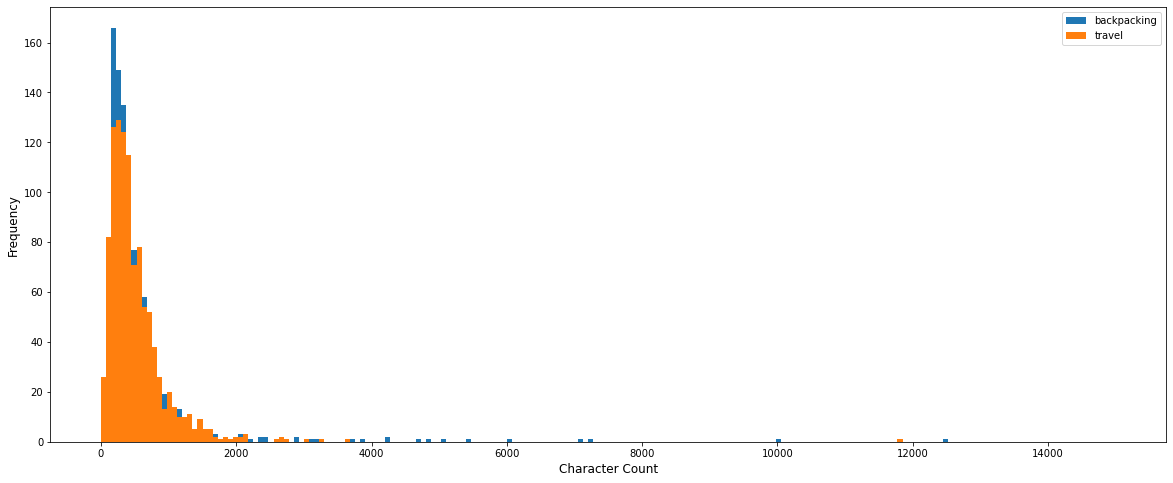

In [83]:
plt.figure(figsize=(20,8))

plt.hist(df.loc[df['subreddit'] == 1, ['post_length']], label='backpacking', bins=200, range=[0, 15000])
plt.hist(df.loc[df['subreddit'] == 0, ['post_length']], label='travel', bins=200, range=[0, 15000])

plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend();

Key observations:
- Both subreddits had extremely right skewed distributions
- Most posts had less than 5000 characters
- Since both classes are relatively balanced and we can see that there is higher frequency for bins of lower character count for backpacking, we could probably say that backpacking subreddit users typed less characters than travel subreddit users in general


**By word count**

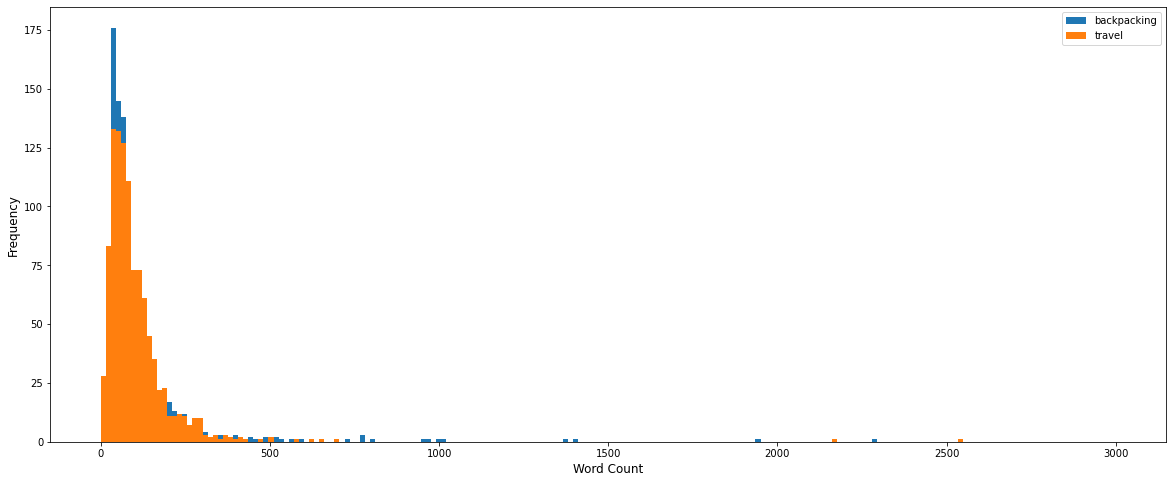

In [84]:
plt.figure(figsize=(20,8))

plt.hist(df.loc[df['subreddit'] == 1, ['word_count']], label='backpacking', bins=200, range=[0, 3000])
plt.hist(df.loc[df['subreddit'] == 0, ['word_count']], label='travel', bins=200, range=[0, 3000])

plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend();

Key observations:

- Unsurprisingly, both histograms should a similar trend (right skewed). 
- Most posts had less than 500 words
- Since both classes are relatively balanced and we can see that there is higher frequency for bins of lower word count for backpacking, we could probably say that backpacking subreddit users typed less words than travel subreddit users in general

## Unique users and average posts per user

We will look at the number of unique users in each subreddit.

**Backpacking subbreddit**

In [85]:
# total number of posts
len(df[df['subreddit'] == 1])

993

In [86]:
# number of unique users
len(set(list(df.loc[df['subreddit'] == 1, 'author'])))

832

In [87]:
# average post per user
avg = len(df[df['subreddit'] == 1]) / len(set(list(df.loc[df['subreddit'] == 1, 'author'])))
print(f'The average post per user for Backpacking subreddit is {round(avg, 2)}.')

The average post per user for Backpacking subreddit is 1.19.


**Travel subbreddit**

In [88]:
# total number of posts
len(df[df['subreddit'] == 0])

1045

In [89]:
# number of unique users
len(set(list(df.loc[df['subreddit'] == 0, 'author'])))

969

In [90]:
# average post per user
avg = len(df[df['subreddit'] == 0]) / len(set(list(df.loc[df['subreddit'] == 0, 'author'])))
print(f'The average post per user for Travel subreddit is {round(avg, 2)}.')

The average post per user for Travel subreddit is 1.08.


## CountVectorizer

We will do some exploratory analysis to see the top 25 words from each subreddit. Using the CountVectorizer, it functions like a bag of words. It counts the number of observations for each words and tallies them up. Bag-of-words representations discard grammar, order, and structure in the text but track occurrences.

### 10 most frequent words from Backpacking subreddit

In [91]:
# Instantiate CountVectorizer
cvec = CountVectorizer(max_features=10,
                       stop_words=custom_stopwords)

In [92]:
backpack_text = df.loc[(df['subreddit'] == 1), 'token_text_string']

In [93]:
backpack_text_transform = cvec.fit_transform(backpack_text)

In [94]:
df_vector_backpack = pd.DataFrame(backpack_text_transform.todense(),
                                 columns=cvec.get_feature_names())

In [95]:
df_vector_backpack.sum().sort_values(ascending=False)

trip       453
day        373
looking    334
get        314
time       293
trail      282
go         281
know       253
anyone     248
first      234
dtype: int64

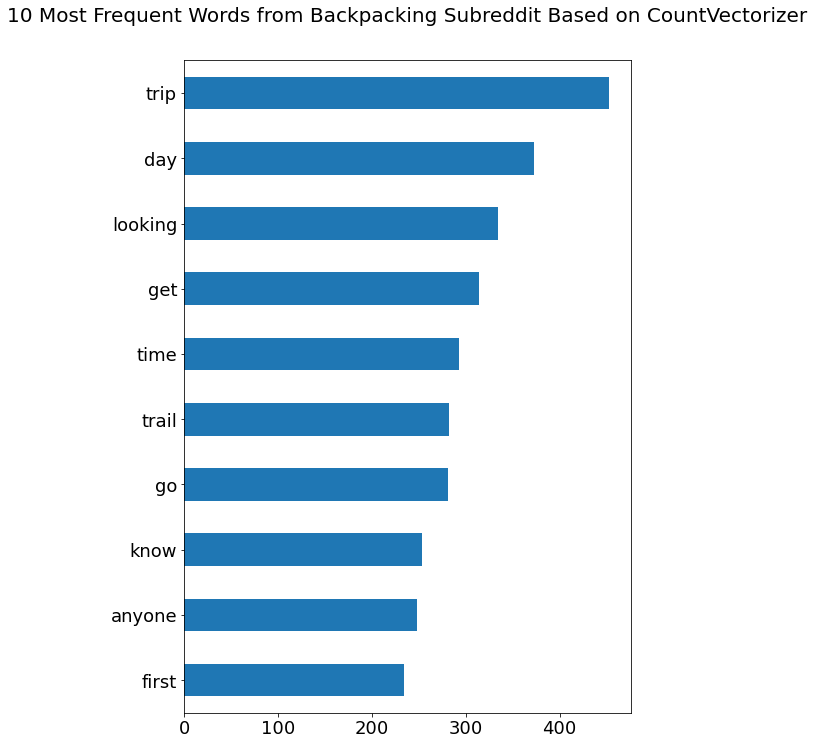

In [96]:
df_vector_backpack.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12));
plt.title('10 Most Frequent Words from Backpacking Subreddit Based on CountVectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis()
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

#### Using lemmatized texts instead

In [97]:
# Instantiate CountVectorizer
cvec_lem = CountVectorizer(max_features=10,
                       stop_words=custom_stopwords)

In [98]:
backpack_text_lem = df.loc[(df['subreddit'] == 1), 'text_lemmatized']

In [99]:
backpack_text_lem_transform = cvec_lem.fit_transform(backpack_text_lem)

In [100]:
df_vector_backpack_lem = pd.DataFrame(backpack_text_lem_transform.todense(),
                                 columns=cvec_lem.get_feature_names())

In [101]:
df_vector_backpack_lem.sum().sort_values(ascending=False)

day        584
trip       557
time       341
trail      338
looking    334
get        324
go         296
know       268
anyone     248
first      234
dtype: int64

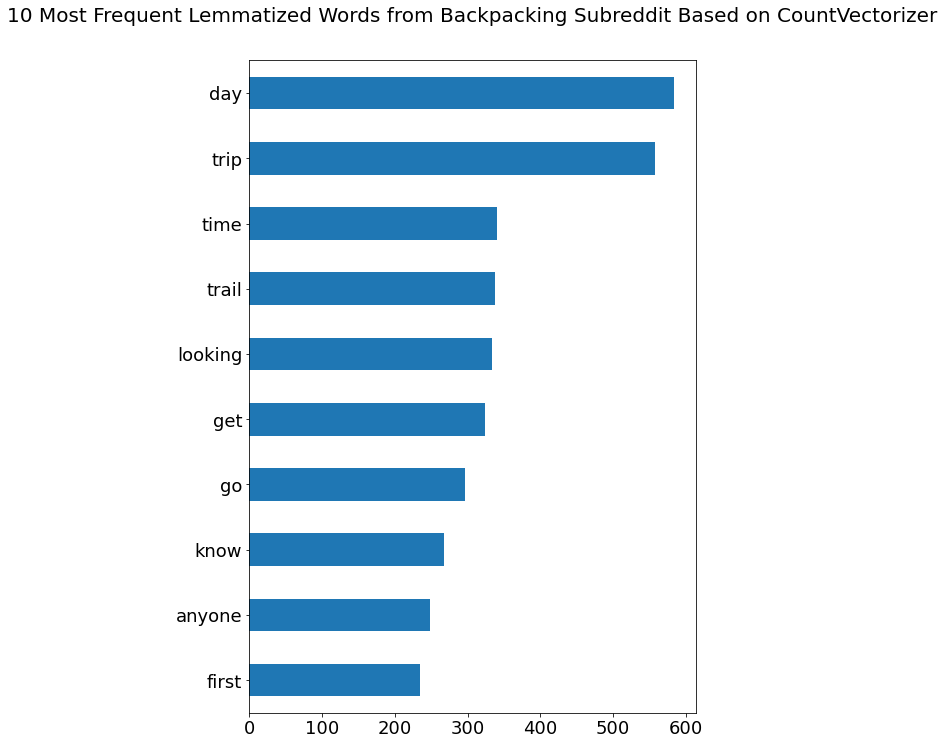

In [102]:
df_vector_backpack_lem.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12));
plt.title('10 Most Frequent Lemmatized Words from Backpacking Subreddit Based on CountVectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

There is some difference to the using lemmatized words and non-lemmatized words when using CountVectorizer to count the most frequent words. Lemmatizing reduces the words to its root form, thereby consolidating words like 'day' and 'days' into one column instead.

### 10 Most frequent words from Travel subreddit

In [103]:
# Instantiate CountVectorizer
cvec = CountVectorizer(max_features=10,
                       stop_words=custom_stopwords)

In [104]:
travel_text = df.loc[(df['subreddit'] == 0), 'token_text_string']

In [105]:
travel_text_transform = cvec.fit_transform(travel_text)

In [106]:
df_vector_travel = pd.DataFrame(travel_text_transform.todense(),
                                 columns=cvec.get_feature_names())

In [107]:
df_vector_travel.sum().sort_values(ascending=False)

day        494
trip       449
go         404
time       400
days       315
get        307
know       287
us         286
looking    255
flight     245
dtype: int64

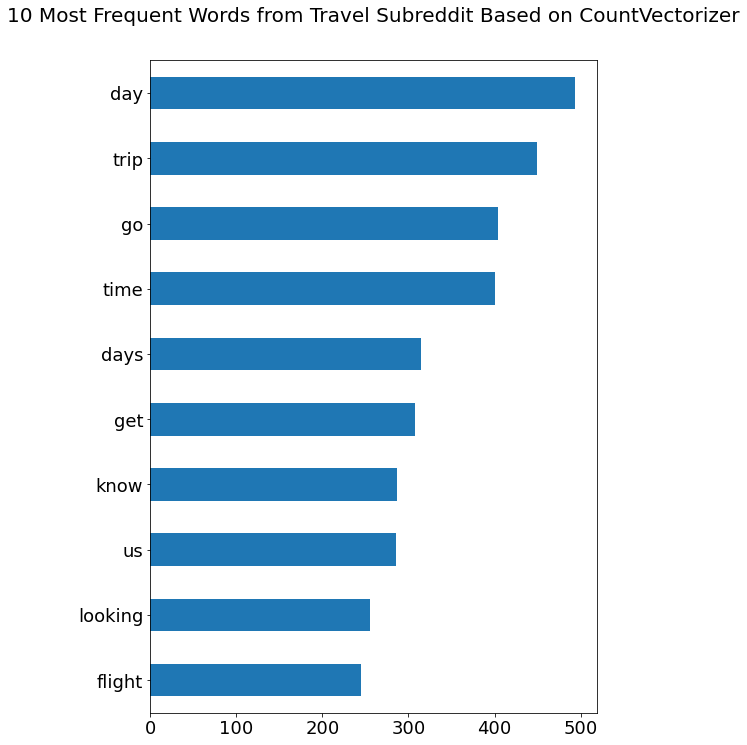

In [108]:
df_vector_travel.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12))
plt.title('10 Most Frequent Words from Travel Subreddit Based on CountVectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

#### Using lemmatized texts instead

In [109]:
# Instantiate CountVectorizer
cvec_lem = CountVectorizer(max_features=10,
                       stop_words=custom_stopwords)

In [110]:
travel_text_lem = df.loc[(df['subreddit'] == 0), 'text_lemmatized']

In [111]:
travel_text_lem_transform = cvec_lem.fit_transform(travel_text_lem)

In [112]:
df_vector_travel_lem = pd.DataFrame(travel_text_lem_transform.todense(),
                                 columns=cvec_lem.get_feature_names())

In [113]:
df_vector_travel_lem.sum().sort_values(ascending=False)

day        809
trip       490
time       445
go         411
flight     353
get        317
know       300
country    292
place      285
city       264
dtype: int64

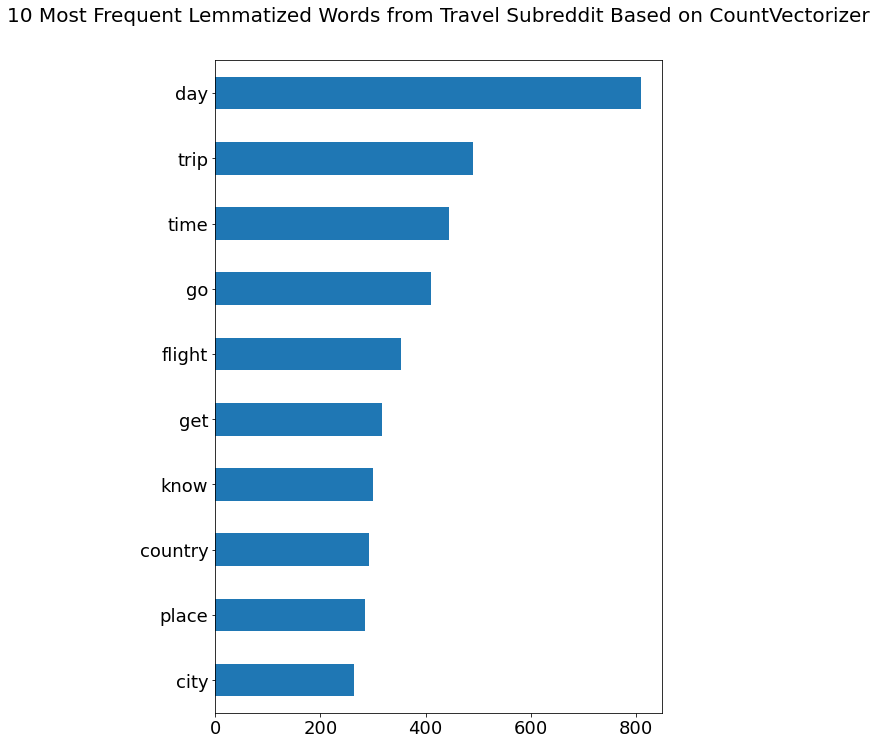

In [114]:
df_vector_travel_lem.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12));
plt.title('10 Most Frequent Lemmatized Words from Travel Subreddit Based on CountVectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

## N-gram range

### Bigram

Let's find out the 25 most common bigrams in the datasets for the respective subreddits, while also taking into account of our customized stopwords.

#### Backpacking subreddit

In [115]:
backpack_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=custom_stopwords)

In [116]:
backpack_bigrams.fit(backpack_text)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [117]:
backpack_bigrams_transform = backpack_bigrams.transform(backpack_text)

In [118]:
backpack_bigrams_df = pd.DataFrame(backpack_bigrams_transform.todense(),
                                   columns=backpack_bigrams.get_feature_names())

In [119]:
backpack_bigrams_df.sum().sort_values(ascending=False).head(10)

thanks advance       47
sleeping bag         45
first time           40
wondering anyone     39
first trip           37
national park        34
day trip             31
south america        30
anyone experience    27
day hike             26
dtype: int64

#### Travel subreddit

In [120]:
travel_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words=custom_stopwords)

In [121]:
travel_bigrams.fit(travel_text)

CountVectorizer(ngram_range=(2, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [122]:
travel_bigrams_transform = travel_bigrams.transform(travel_text)

In [123]:
travel_bigrams_df = pd.DataFrame(travel_bigrams_transform.todense(),
                                   columns=travel_bigrams.get_feature_names())

In [124]:
travel_bigrams_df.sum().sort_values(ascending=False).head(10)

first time          63
day trip            58
thanks advance      49
planning trip       35
fully vaccinated    33
next year           33
anyone know         31
hi everyone         28
new york            24
rent car            24
dtype: int64

### Trigram

Let's also look at 25 most common trigrams in the datasets for the respective subreddits, while also taking into account of our customized stopwords.

#### Backpacking subreddit

In [125]:
backpack_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words=custom_stopwords)

In [126]:
backpack_trigrams.fit(backpack_text)

CountVectorizer(ngram_range=(3, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [127]:
backpack_trigrams_transform = backpack_trigrams.transform(backpack_text)

In [128]:
backpack_trigrams_df = pd.DataFrame(backpack_trigrams_transform.todense(),
                                   columns=backpack_trigrams.get_feature_names())

In [129]:
backpack_trigrams_df.sum().sort_values(ascending=False).head(10)

south east asia           10
gt gt gt                  10
please let know            9
jammu jammu kashmir        8
first aid kit              8
unesco world heritage      7
day night trip             6
working holiday visa       6
adobe acrobat pro          6
portable solar charger     6
dtype: int64

#### Travel subreddit

In [130]:
travel_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words=custom_stopwords)

In [131]:
travel_trigrams.fit(travel_text)

CountVectorizer(ngram_range=(3, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [132]:
travel_trigrams_transform = travel_trigrams.transform(backpack_text)

In [133]:
travel_trigrams_df = pd.DataFrame(travel_trigrams_transform.todense(),
                                   columns=travel_trigrams.get_feature_names())

In [134]:
travel_trigrams_df.sum().sort_values(ascending=False).head(10)

south east asia                        10
please let know                         9
unesco world heritage                   7
working holiday visa                    6
yellow fever vaccine                    5
stove set ups                           5
help greatly appreciated                5
wondering anyone else                   5
wondering anyone suggestions            4
recommendations greatly appreciated     4
dtype: int64

## TF-IDF Vectorizer

Unlike CountVectorizer which simplistically counts all the number of word occurence and stores them in columns (vectors), the Term Frequency-Inverse Document Frequency (TF-IDF) Vectorizer tells us which words are important to one document, relative to all other documents. Words that occur often in one document but don't occur in many documents contain more predictive power.

In [150]:
# Instantiate TF-IDF Vectorizer
tvec = TfidfVectorizer(max_features=10,
                      stop_words=custom_stopwords,   # using our own custom stopwords
                      ngram_range = (1, 3))  

### 10 most frequent words from Backpacking subreddit

In [151]:
# reusing our backpack_text which we created in CountVectorizer section
backpack_tf_transform = tvec.fit_transform(backpack_text)  

In [152]:
df_vector_backpack_tf = pd.DataFrame(backpack_tf_transform.todense(),
                                     columns=tvec.get_feature_names())

In [153]:
df_vector_backpack_tf.sum().sort_values(ascending=False)

trip       164.336700
looking    153.522187
anyone     140.045182
get        125.056178
know       120.251617
go         118.870622
day        113.101305
time       110.367529
trail       87.483271
first       84.279317
dtype: float64

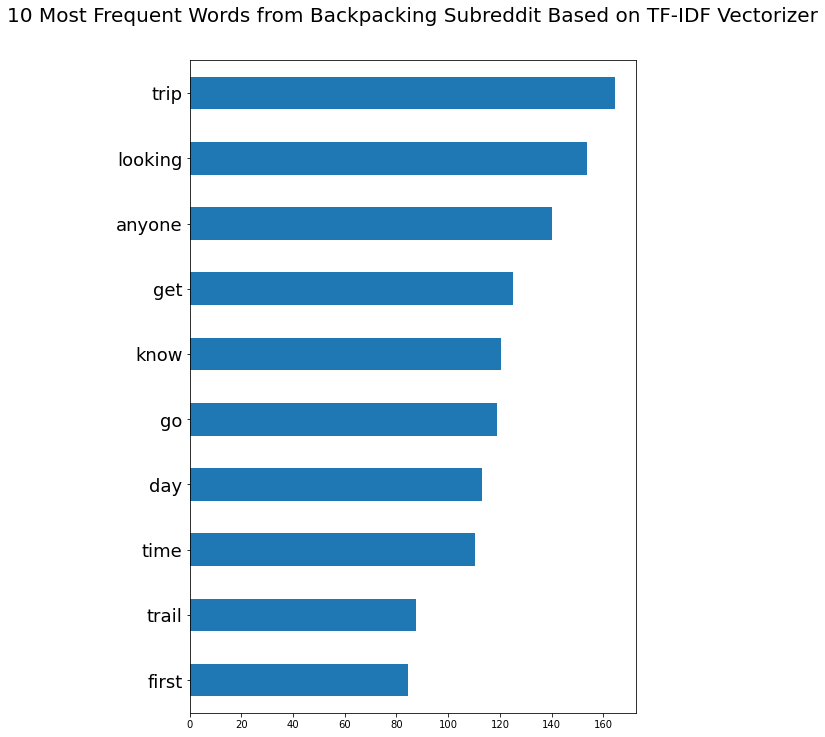

In [154]:
df_vector_backpack_tf.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12))
plt.title('10 Most Frequent Words from Backpacking Subreddit Based on TF-IDF Vectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);

#### Using lemmatized text instead

In [155]:
# reusing our backpack_text_lem which we created in CountVectorizer section
backpack_text_lem_transform = tvec_lem.fit_transform(backpack_text_lem)  

In [156]:
df_vector_backpack_lem = pd.DataFrame(backpack_text_lem_transform.todense(),
                                 columns=tvec_lem.get_feature_names())

In [157]:
df_vector_backpack_lem.sum().sort_values(ascending=False)

day        584
trip       557
time       341
trail      338
looking    334
get        324
go         296
know       268
anyone     248
first      234
dtype: int64

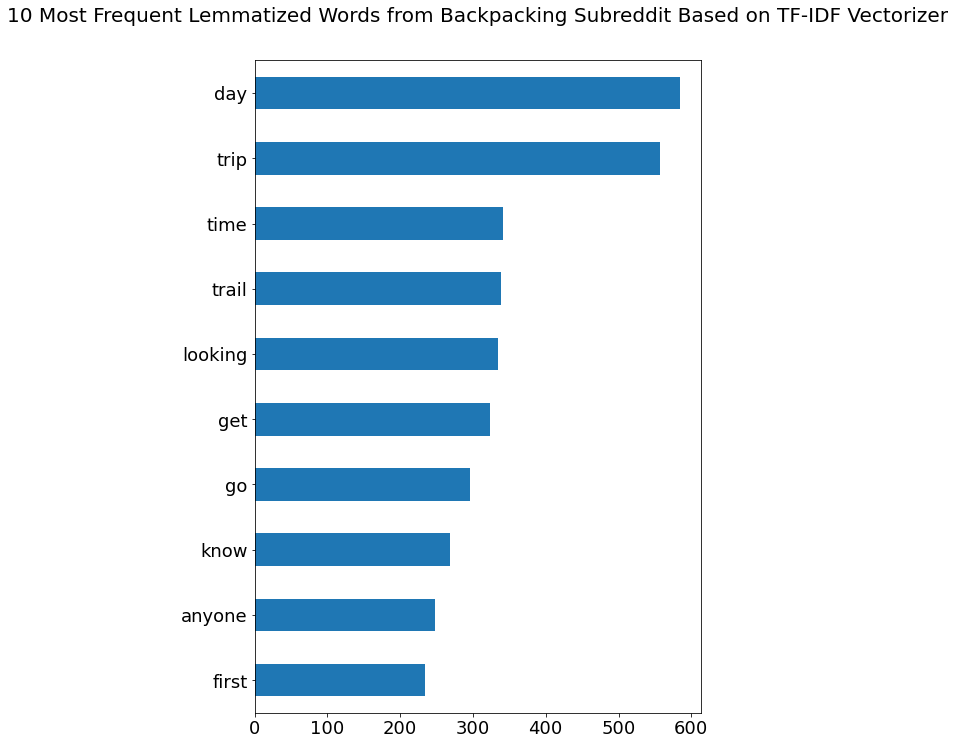

In [158]:
df_vector_backpack_lem.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12));
plt.title('10 Most Frequent Lemmatized Words from Backpacking Subreddit Based on TF-IDF Vectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

### 10 most frequent words from Travel subreddit

In [159]:
# reusing our travel_text df which we created in CountVectorizer section
travel_tf_transform = tvec.fit_transform(travel_text)  

In [160]:
df_vector_travel_tf = pd.DataFrame(travel_tf_transform.todense(),
                                   columns=tvec.get_feature_names())

In [161]:
df_vector_travel_tf.sum().sort_values(ascending=False)

trip       161.098132
go         159.546414
time       138.643160
know       135.384581
looking    129.316150
get        123.726503
us         116.622300
days       105.945770
day        104.231891
flight      87.671481
dtype: float64

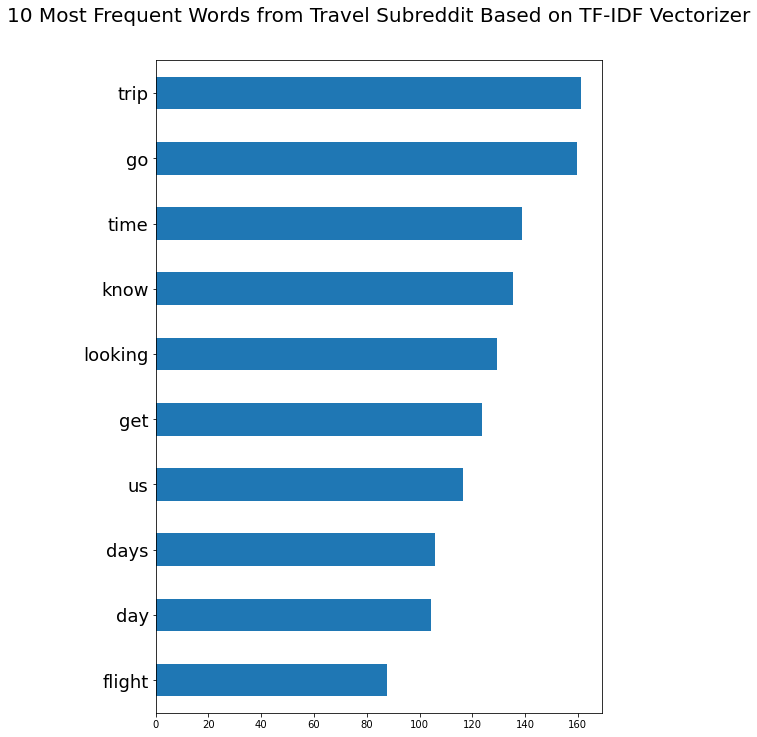

In [162]:
df_vector_travel_tf.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12))
plt.title('10 Most Frequent Words from Travel Subreddit Based on TF-IDF Vectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);

#### Using lemmatized text instead

In [163]:
# reusing our travel_text_lem which we created in CountVectorizer section
travel_text_lem_transform = tvec_lem.fit_transform(travel_text_lem)

In [164]:
df_vector_travel_lem = pd.DataFrame(travel_text_lem_transform.todense(),
                                 columns=tvec_lem.get_feature_names())

In [165]:
df_vector_travel_lem.sum().sort_values(ascending=False)

day        809
trip       490
time       445
go         411
flight     353
get        317
know       300
country    292
place      285
city       264
dtype: int64

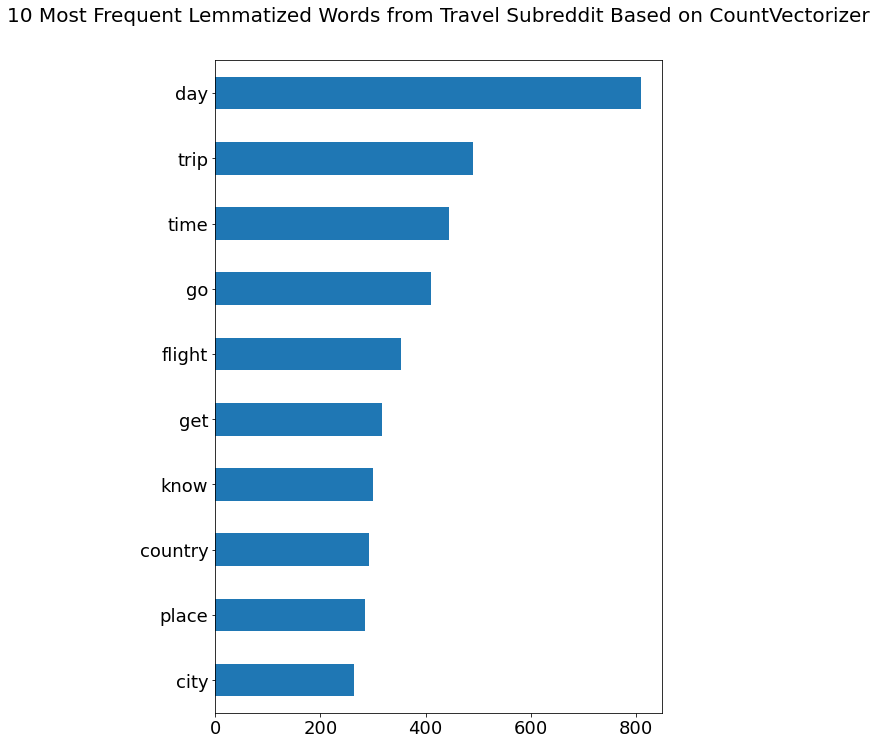

In [166]:
df_vector_travel_lem.sum().sort_values(ascending=False).plot(kind='barh', figsize=(8,12));
plt.title('10 Most Frequent Lemmatized Words from Travel Subreddit Based on CountVectorizer', fontsize=20, x=0.5, y=1.05)
plt.gca().invert_yaxis();
plt.tick_params(axis="y", labelsize=18);
plt.tick_params(axis="x", labelsize=18);

# Saving combined dataframe for modeling

We will save the combined copy of the dataframe for preprocessing and modeling in our final notebook.

In [167]:
# final check that there is no null values
df.isnull().sum()

author               0
title                0
selftext             0
subreddit            0
clean_text           0
token_text           0
token_text_string    0
text_lemmatized      0
post_length          0
word_count           0
dtype: int64

In [168]:
df.to_csv('../datasets/combined.csv', index=False)